# Pair Programming- Justin and Nuri
#### Trying to find correlation between month and worldwide Gross

##### Import statements

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import scipy.stats as stats
from math import sqrt

#### Reading relevant tables

In [29]:
tn_budgets = pd.read_csv("../../data/zippedData/tn.movie_budgets.csv.gz")
tn_budgets.head(10)



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [30]:
# change release_date column from str to datetime 
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])
# cleaning data to get rid of unwanted characters for analysis
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')
tn_budgets = tn_budgets.astype({'production_budget': 'int64'})
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$','')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',','')
tn_budgets = tn_budgets.astype({'domestic_gross': 'int64'})
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')
tn_budgets = tn_budgets.astype({'worldwide_gross': 'int64'})
tn_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [33]:
tn_budgets["release_month"] = tn_budgets["release_date"].dt.month 

In [34]:
# tn_budgets["release_month"].corr(tn_budgets["worldwide_gross"])
tn_budgets["worldwide_gross"].mean()
by_month = tn_budgets.groupby("release_month")["worldwide_gross"].mean()


## Map average gross revenue by month

<AxesSubplot:title={'center':'AVG Gross Per Month'}, xlabel='Months', ylabel='Mean Gross'>

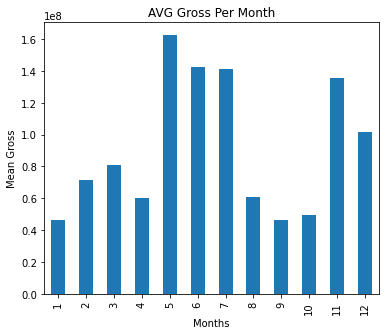

In [35]:
by_month.plot(kind='bar', title='AVG Gross Per Month', ylabel='Mean Gross',
         xlabel='Months', figsize=(6, 5))

In [23]:
tn_budgets["release_season"] = tn_budgets["release_date"].dt.quarter
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_season
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12,4
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,4
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,12,4
5778,79,1999-04-02,Following,6000,48482,240495,4,2
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,3
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,9,3


In [36]:
season_month = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}

    
tn_budgets['release_season'] = tn_budgets["release_month"].map(season_month)
by_season = tn_budgets.groupby("release_season")["worldwide_gross"].mean()

<AxesSubplot:title={'center':'AVG Gross Per Month'}, xlabel='Months', ylabel='Mean Gross'>

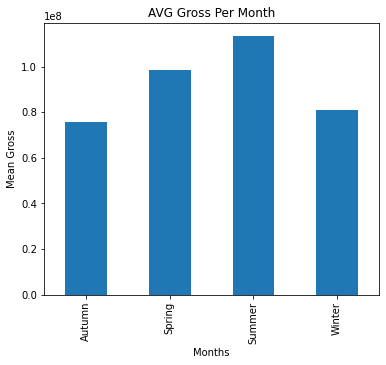

In [37]:
by_season.plot(kind='bar', title='AVG Gross Per Month', ylabel='Mean Gross',
         xlabel='Months', figsize=(6, 5))

In [41]:
season_mean = tn_budgets.groupby("release_season")["worldwide_gross"].mean()
season_mean

release_season
Autumn    7.560155e+07
Spring    9.853085e+07
Summer    1.134543e+08
Winter    8.083862e+07
Name: worldwide_gross, dtype: float64

In [43]:
import scipy.stats as stats
from math import sqrt
x_bar = 113454300 # sample mean of summer 
n = 5782 # number of all inputs
sigma = 174720000 # sd of all inputs
mu = 91487460 # all inputs mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

9.56013465566172